# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
sgd = keras.optimizers.SGD
rmsprop = keras.optimizers.rmsprop
adagrad = keras.optimizers.adagrad
adam = keras.optimizers.adam
optimizers = [sgd, rmsprop, adagrad, adam]

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt in optimizers:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with OPTIMIZER = %s" % opt)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    if opt == sgd:
        optimizer = opt(lr=LEARNING_RATE, momentum=MOMENTUM)
    else:
        optimizer = opt(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-optimizer-%s" % opt
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with OPTIMIZER = <class 'keras.optimizers.SGD'>
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
I

50000/50000 [==============================] - 10s 206us/step - loss: 1.3679 - acc: 0.5114 - val_loss: 1.5102 - val_acc: 0.4691
Epoch 15/25
50000/50000 [==============================] - 10s 205us/step - loss: 1.3467 - acc: 0.5166 - val_loss: 1.5803 - val_acc: 0.4444
Epoch 16/25
50000/50000 [==============================] - 10s 205us/step - loss: 1.3272 - acc: 0.5245 - val_loss: 1.6651 - val_acc: 0.4360
Epoch 17/25
50000/50000 [==============================] - 10s 206us/step - loss: 1.3031 - acc: 0.5359 - val_loss: 1.5332 - val_acc: 0.4733
Epoch 18/25
50000/50000 [==============================] - 10s 205us/step - loss: 1.2829 - acc: 0.5409 - val_loss: 1.6384 - val_acc: 0.4333
Epoch 19/25
50000/50000 [==============================] - 10s 207us/step - loss: 1.2615 - acc: 0.5492 - val_loss: 1.5471 - val_acc: 0.4613
Epoch 20/25
50000/50000 [==============================] - 10s 205us/step - loss: 1.2425 - acc: 0.5558 - val_loss: 1.5791 - val_acc: 0.4636
Epoch 21/25
50000/50000 [=======

Epoch 7/25
50000/50000 [==============================] - 12s 242us/step - loss: 1.4380 - acc: 0.4873 - val_loss: 1.4743 - val_acc: 0.4778
Epoch 8/25
50000/50000 [==============================] - 12s 242us/step - loss: 1.3945 - acc: 0.5031 - val_loss: 1.4457 - val_acc: 0.4866
Epoch 9/25
50000/50000 [==============================] - 12s 248us/step - loss: 1.3791 - acc: 0.5072 - val_loss: 1.4699 - val_acc: 0.4755
Epoch 10/25
50000/50000 [==============================] - 12s 243us/step - loss: 1.3489 - acc: 0.5199 - val_loss: 1.4239 - val_acc: 0.5022
Epoch 11/25
50000/50000 [==============================] - 12s 234us/step - loss: 1.3223 - acc: 0.5294 - val_loss: 1.4016 - val_acc: 0.4986
Epoch 12/25
50000/50000 [==============================] - 12s 234us/step - loss: 1.2945 - acc: 0.5405 - val_loss: 1.3594 - val_acc: 0.5200
Epoch 13/25
50000/50000 [==============================] - 12s 241us/step - loss: 1.2715 - acc: 0.5475 - val_loss: 1.4362 - val_acc: 0.4922
Epoch 14/25
50000/50000

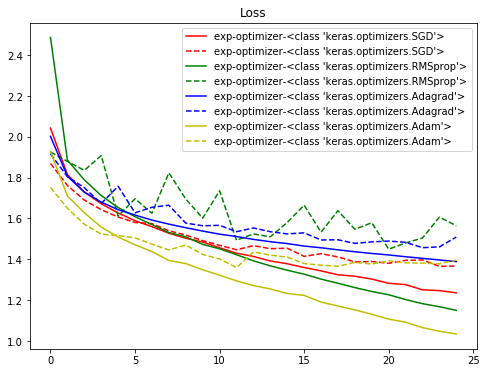

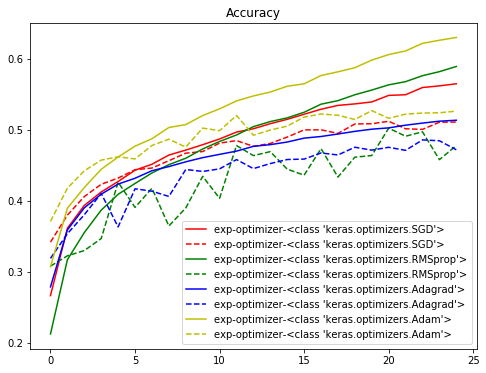

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()